# Group Project Exercise Sheet

**Group 8: Qiuyang Chen, Guangyu Li, Chenwei Xiao**

Welcome to the lovely home of your group project for this years' *Statistical Learning in Atmospheric and Climate Sciences* Lecture. This is the place where you find all information regarding your group project, and also the place to work on your group project. You will submit a copy of this file in the end.

## Project description

You are working in groups of 2-3 people. Each group will get assigned, at random, a dataset and a method that was discussed during the lecture. The datasets are coming from the Atmospheric and Climate Sciences, and are both taken from real-world research problems. Your task is to use the two methods you were assigned (one linear and one nonlinear statistical learning method) to fit and predict from the dataset you have been given. For the prediction, you will be given a part of the dataset consisting only of predictors but with target values omitted. For comparing your methods, you will also fit a multiple linear regression model (without any regularisation) to the dataset.

The methods you have been assigned may or may not be suitable one for the dataset. However, the final performance of your code, that is the precision of your prediction, is not important. The key goal is to show that 

1. you understand the theoretical background of what a specific method is doing or attempts to do;
2. you are aware of the strengths and limitations of a given method applied to a concrete atmospheric science problem;
3. you are able to correctly apply the method in a training/testing context (e.g., cross-validation, hyperparameter selection, etc.);
4. you are able to interpret the results of your method application to the atmospheric science problem.

Below we have already constructed a framework that helps you through data reading and preparation, gives you space for model fitting and prediction and in the end asks you the questions you need to work on. So you just need to work along the framework and make sure you carefully answer each question, and then you can hand in!

## Method and Data

The pool of methods consists of

| Method | R packages | Your method |
| :- | :- | :- |
| Ridge Regression | `glmnet` |  |
| Lasso Regression | `glmnet` | X |
| Random Forest | `randomForest` |  |
| Boosted Trees | `gbm` | X |
| Neural Net | `nnets` |   |

you can only use the listed packages, since no additional packages are installed on the server.

And this is the dataset you'll be working with:

2. **Estimation of the state of forced climate change from annual temperature maps** <br>
Internal atmospheric variability affects the climate system at all temporal and spatial scales. Therefore, detecting externally forced climate change from maps of (for example) annual temperatures is not straightforward. In fact, there will be always inescapable uncertainty around how much a certain climate state is made up of internal variability and externally forced change, as we only observe a combination of the two.

    The goal of the present project is to estimate two target metrics that describe the state of externally forced climate from global annual temperature maps, using statistical learning methods. The two target metrics are the forced global mean temperature response ($F_T$), in °C, a vector of length $n$ equal to the number of training samples), and the year from which a certain annual temperature map comes from ($F_Y$). This type of statistical learning based climate change detection is indeed used in current climate research (see Barnes et al. 2019; Sippel et al. 2020 for a more detailed description of this idea). We’ll estimate both metrics from annual global temperature maps ($X$), matrices of $n$ $x$ $p$, where $n$ is the number of training samples, and $p$ is the number of grid cell predictors, here $p=2592$). Hence, our goal is to estimate a function $f$ in order to derive a prediction $\hat{F}$ using a relationship of the form $F=f(X)+ \epsilon$.

    For this project, we will make use of an ensemble of climate model simulations. Our ensemble is made up of seven different climate models ("CanESM2", "CESM1-CAM5", "CSIRO-Mk3-6-0", "EC-EARTH", "GFDL-CM3", "GFDL-ESM2M", "MPI-ESM"), and each climate model contains ten simulations up to the year 2030 that we can use for training our statistical learning model. In the case of these model simulations (and in contrast to observed climate data), we know metrics of forced climate change ($F_T$, $F_Y$), because the ensemble average across a large number of simulations reveals forced (=systematic) changes, whereas individual members show (partly large) internal variability on top of a systematic forced change.

    A simple illustration for a prediction based on a few (20) randomly selected grid cells using a multiple linear regression is shown in the script to get you started, along with a number of reasonable visualizations of the dataset. For a successful application, you will train, compare, and interpret (a) a linear and (b) a nonlinear method in order to predict $F_T$ and $F_Y$. In particular for the nonlinear methods, you won’t be able to train your model with all $p=2592$ possible predictors, so you need to do some feature selection. 
    You will receive a number of simulated data Xtrain (but without knowing the forced metrics ($F_T$, $F_Y$), for which you will generate a prediction.

    References:
    
    Barnes, E.A., Hurrell, J.W., Ebert‐Uphoff, I., Anderson, C. and Anderson, D., 2019. Viewing forced climate patterns through an AI Lens. Geophysical Research Letters, 46(22), pp.13389-13398.
 
    Sippel, S., Meinshausen, N., Fischer, E.M., Székely, E. and Knutti, R., 2020. Climate change now detectable from any single day of weather at global scale. Nature Climate Change, 10(1), pp.35-41.

## Help, Submission and Grading

Please use our moodle forum if you need help. For help on the specific methods or implementation choices, check the specific exercises (all methods have been part of the Exercises), or use the R help (e.g., `?randomForest`).

1. You have to submit your notebook both as an .ipynb *and* as an html file (go to File -> Download as -> HTML) to Moodle until 15th of December 2020, 08:00. 

2. Submit your predictions by Sunday, 13.12.2020, 23:59 through mail to us (sebastian.sippel@env.ethz.ch). Format of predictions: .rds or .Rdata files, following the examples given in the code below. In order to download the .rds/.Rdata file, right-click it in the file browser on the left, where you find the option "Download". Important: In the mail with your predictions, please send us your anticipated error estimates (i.e., MSE and R$^2$) for your predictions (it's not actually so important how good the prediction is (as long as it's reasonable), but it is important that you can provide an accurate error estimate on the unseen test dataset).

An additional bonus of a +0.25 grade boost will be given if you review the projects of the other groups after submission. The review window will be open from 15th of December until 23.12.2020 (23:59). More information on the review process will follow soon.

## IMPORTANT: A note on parallel working on a shared resource

Please note that any one of your group is writing to the same notebook, even if it looks like it is saved in your home directory. That means that **group members cannot work on the notebook at the same time**. Make sure to talk to each other before opening the notebook in your hub. Disregarding this advice might lead to loss of data!

All groups are sharing the same server resources. Please be considerate of your fellow students and do not overload the server. Some methods can be very expensive (i.e. taking long and needing a lot of resources) if the hyperparameters are set to allow the model to grow large. It is ok to use a less precise, less expensive model in your final solution. It is what scientists do all the time. If you need to do that, make sure to discuss this decisions in the evaluation section.

## Preprocessing P2: Estimation of the state of forced climate change from annual temperature maps

Below you will find the code that loads and preprocesses your data. Select the dataset you have been assigned to. If you have executed the code, you will end up with data in a tabular manner (rows: datapoints, columns: variables = features). Now it's your turn! Define the predictand and the predictor table. We have already done some feature engineering, i.e. added some features to the table that we think might be valuable for the prediction. However, you can choose how many features (one, some or all) for your model as you like. We suggest you play around a bit with it to understand what your model is doing. 

Load libraries and custom functions.

In [2]:
########################################################################
## 0.a. required packages
########################################################################

library(raster)
library(RColorBrewer)
library(rworldmap)
library(ncdf4)
library(sp)
library(dplyr)
library(glmnet)
library(RColorBrewer)
library(gbm)
library(caret)

# Define colours for plotting:
col.seq = rev(colorRampPalette(brewer.pal(n = 11, name = "RdBu"))(99))
col = rev(colorRampPalette(brewer.pal(n = 9, name = "YlOrRd"))(99))
col.r = colorRampPalette(brewer.pal(n = 9, name = "Reds"))(99)


########################################################################
## 0.b. Functions.
########################################################################
MSE <- function(obs, sim) { mean( ( obs - sim ) ^ 2 ) }


Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.0-2

Loaded gbm 2.1.8

Loading required package: lattice

Loading required package: ggplot2



Load .RData files, and inspect the files.

In [3]:
########################################################################
## 0.c. Load data
########################################################################
load("data/Project2_data.Rdata")

########################################################################
## 0.d. Inspect the data
########################################################################

str(LENS_tas_ann_train$X)
# LENS_tas_ann_train$X :  A n x p matrix that contains the number of samples n (n = 9100), and the number of grid cells as potential predictors p (p = 2592) for the training data.

str(LENS_tas_ann_train$Y)
# LENS_tas_ann_train$Y : A data frame that contains 
# 1. fraw (target variable 1: the global mean forced temperature response in [°C], i.e. the state of externally forced climate change in °C)
# 2. year (target variable 2: the year for which the simulation was generated).

str(LENS_tas_ann_train$M)
# A data frame that contains metadata (most of which you probably won't need). Metadata include the variable (tas: surface air temperature), resolution (annual), original file name, details about
# modeling scenario (cmip, scen), the ensemble member name (ens.mem), and the climate model which generated the simulation (mod, modcl).

str(LENS_tas_ann_train$coord)
# A data frame that contains the spatial meta-data, i.e. x and y coordinates of each grid cell, and the area weights of each grid cell for computing a global weighted average (areaw).

str(LENS_tas_ann_test)
# $X The test dataset containing only predictors (with target values omitted)

 num [1:9100, 1:2592] 0.0354 -0.6857 0.3523 0.9861 1.3746 ...
'data.frame':	9100 obs. of  4 variables:
 $ AGMT: num  0.1629 0.2134 0.1824 -0.0548 0.045 ...
 $ fraw: num  0.233 0.26 0.255 0.229 0.207 ...
 $ fl  : num  0.298 0.277 0.257 0.239 0.222 ...
 $ year: num  1950 1951 1952 1953 1954 ...
'data.frame':	9100 obs. of  9 variables:
 $ vari     : chr  "tas" "tas" "tas" "tas" ...
 $ res      : chr  "ann" "ann" "ann" "ann" ...
 $ file.name: chr  "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" "ann_tas_Amon_CanESM2_historical_rcp85_r10i1p1_195001-210012_g025.nc" ...
 $ cmip     : chr  "LENS" "LENS" "LENS" "LENS" ...
 $ mod      : chr  "CanESM2" "CanESM2" "CanESM2" "CanESM2" ...
 $ modcl    : chr  "Can" "Can" "Can" "Can" ...
 $ scen     : chr  "rcp85" "rcp85" "rcp85" "rcp85" ...
 $ ens.mem  : chr  "r10i1p1" "r10i1p1" "r10i1p1" "r1

Visualize your dataset.

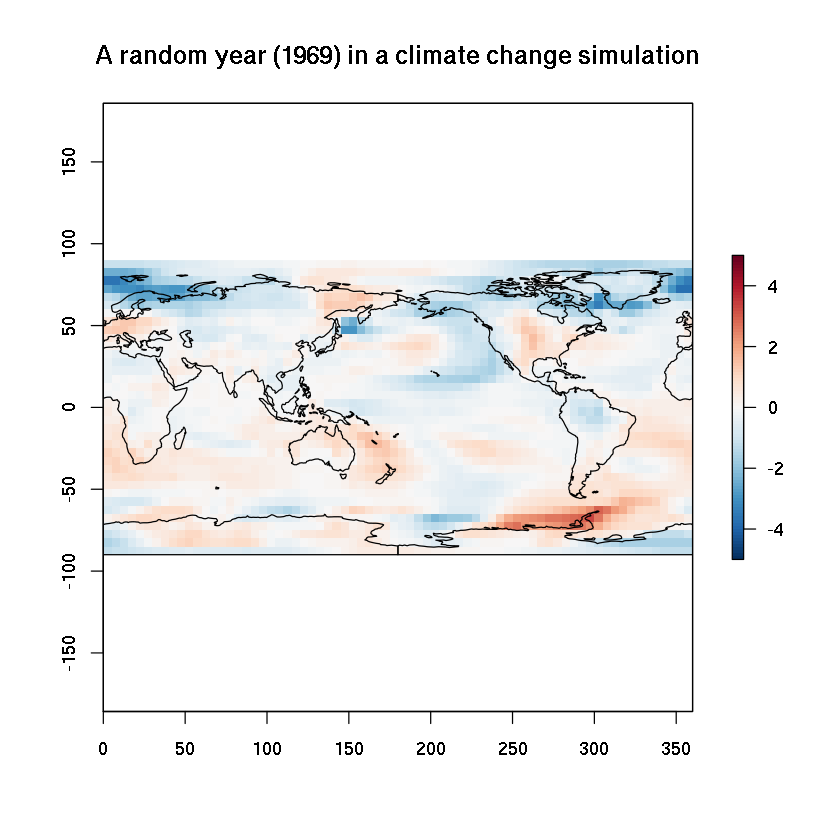

In [4]:
########################################################################
## 0.e. Visualize your dataset
########################################################################

# 1. plot random year's annual temperature anomalies (sample Nr. 2000):
par(mfrow=c(1,1))
plot.random.year <- raster.template 
values(plot.random.year) = c(matrix(LENS_tas_ann_train$X[2200,], 72, 36)[,36:1])
plot(plot.random.year, col = col.seq, zlim = c(-5,5), main = "A random year (1969) in a climate change simulation")
lines(land.polygon)

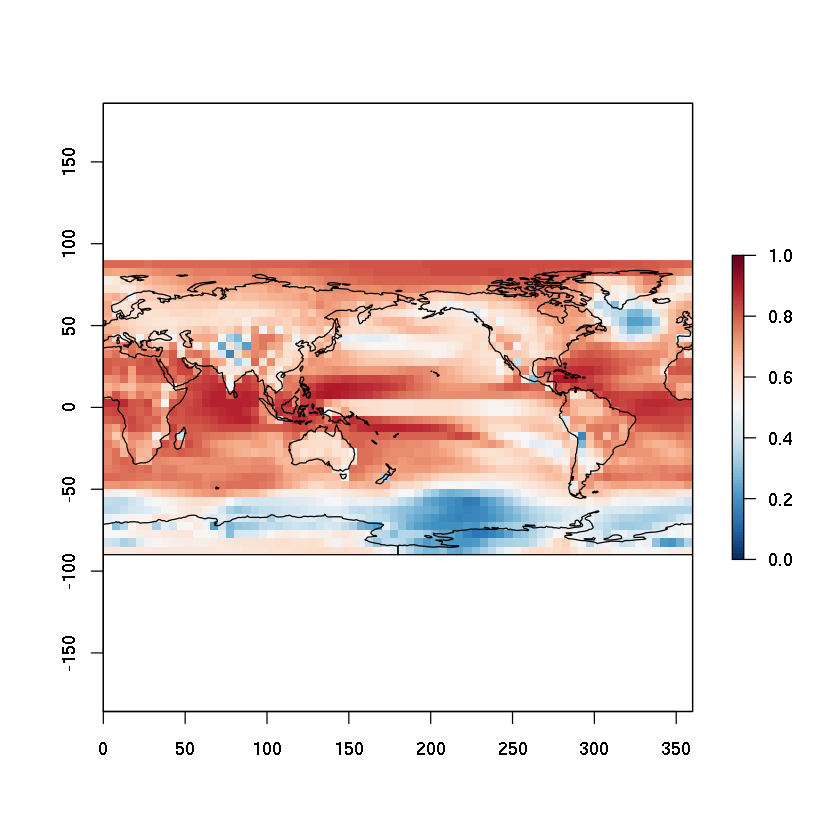

In [5]:
# 2. Correlations between each grid cell and the target "forced response"
mar.cor = apply(X = LENS_tas_ann_train$X, MARGIN=2, FUN=function(x) cor(x, LENS_tas_ann_train$Y$fraw))

plot.mar.cor <- raster.template 
values(plot.mar.cor) = c(matrix(mar.cor, 72, 36)[,36:1])
plot(plot.mar.cor, col = col.seq, zlim = c(0,1))
lines(land.polygon)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


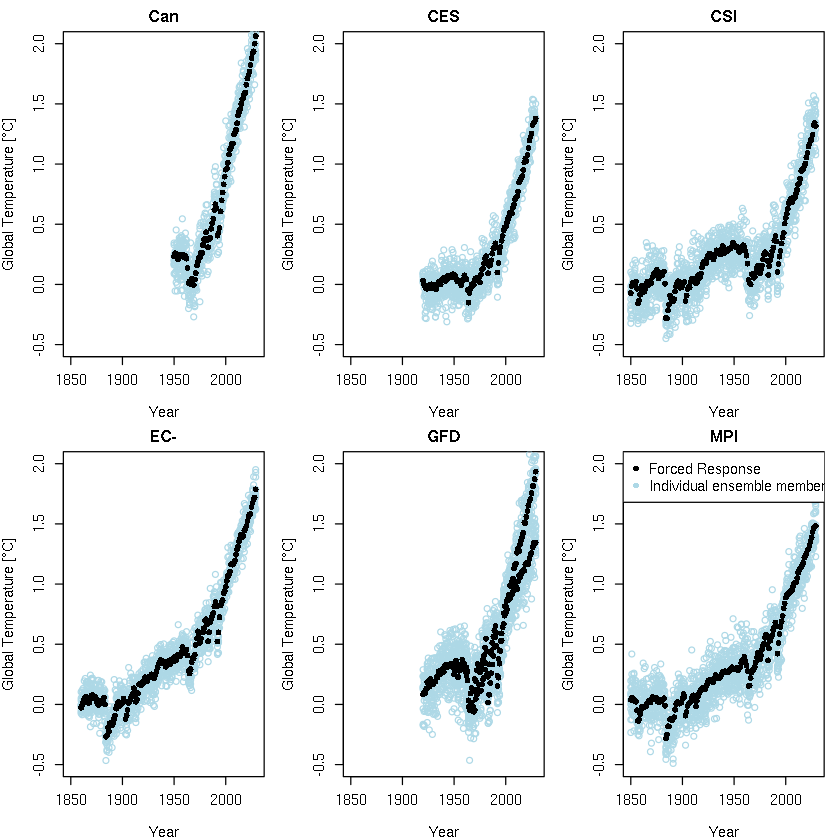

In [6]:
# 3. forced response and year for each ensemble member:
par(mfrow=c(2,3), mar=c(4,4,2,1))

for (i in 1:length(unique(LENS_tas_ann_train$M$modcl))) {
  print(i)
  ix=which(LENS_tas_ann_train$M$modcl == unique(LENS_tas_ann_train$M$modcl)[i])
  
  plot(c(1,1), xlim = c(1850, 2030), ylim = c(-0.5, 2), xlab = "Year", ylab = "Global Temperature [°C]", main = unique(LENS_tas_ann_train$M$modcl)[i])
  points(x = LENS_tas_ann_train$Y$year[ix], y = LENS_tas_ann_train$Y$AGMT[ix], col = "lightblue")
  points(x = LENS_tas_ann_train$Y$year[ix], y = LENS_tas_ann_train$Y$fraw[ix], pch = 16)
}
legend("topleft", c("Forced Response", "Individual ensemble members"), pch = 16, col = c("black", "lightblue"))

## Apply Model P2: Estimation of the state of forced climate change from annual temperature maps

Simple prediction workflow using multiple linear regression

In [7]:
########################################################################
########################################################################
## 1. Simple prediction workflow using multiple linear regression
########################################################################
########################################################################

########################################################################
## 1.a. Setup of training data & feature selection
########################################################################

# 1. Perform simple randomized feature selection:
set.seed(seed = 5)
grid.ix = sort(sample(x = 1:2592, size = 20, replace = F, prob = LENS_tas_ann_train$coord$areaw))

# 2. Generate data frames for OLS fit:
train.DF = data.frame(y=LENS_tas_ann_train$Y$fraw, X = LENS_tas_ann_train$X[,grid.ix])
train.DF2 = data.frame(y=LENS_tas_ann_train$Y$year, X = LENS_tas_ann_train$X[,grid.ix])

In [8]:
train.DF %>% head()

,y,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,⋯,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2331658,0.62255127,0.4829075,0.4785004,0.180195023,-0.2328060,-0.03490093,0.22369771,0.22973529,0.19919445,⋯,0.20509859,0.29255839,0.10661705,-0.1449824,1.5516891,0.2417018844,0.3200002,0.1439581,0.74163895,1.8093529
2,0.2597995,-0.07044189,0.7655003,1.1378632,0.149067094,0.1749088,-0.56218364,0.46936421,0.41567889,0.23059704,⋯,0.16170260,-0.06065206,-0.01673500,0.2422246,1.3076705,0.3849208786,-0.7585825,1.3288336,0.18075638,1.1653710
3,0.2552939,1.77402527,0.5194981,0.7333222,0.350361039,0.1401798,0.09174702,0.12372212,0.12597552,0.25241711,⋯,0.19249483,-0.04850607,-0.02985756,0.1798467,0.8410567,0.6351955368,-0.6707530,0.5612860,-0.09353561,-0.4949379
4,0.2289685,1.26573975,0.3882114,0.7083588,-0.004436324,0.3749821,0.59144185,-0.04943462,-0.03418073,0.04465344,⋯,-0.20981840,-0.15440206,-0.11414711,-0.1819697,0.8586654,0.7607753708,0.3260732,0.2220221,-0.36611862,-1.6450538
5,0.2074831,2.31409485,0.5597813,0.5371552,0.615497758,0.1588566,1.17585347,-0.13030620,0.29095355,0.32535412,⋯,-0.24216703,-0.06208639,-0.12757484,0.6652593,0.9526290,0.1070583298,-0.7594065,0.7567816,-0.68243332,0.3490868
6,0.2441052,1.39173157,0.2508823,0.4446564,0.325489213,0.2845585,0.55750630,0.22076802,0.18594256,0.19876721,⋯,-0.03080229,-0.09709005,-0.03080360,0.5940312,1.5568770,0.0008876755,-1.3965830,0.3534918,1.49710160,0.0407982


In [9]:
########################################################################
## 1.b. Fit OLS models for both target metrics
########################################################################

# 3 Fit OLS for both target metrics using all data
# (you may not want to use the same data for fitting and evaluation with statistical learning methods - split into train/test data or cross-vali):
my.OLS.mod = lm(y ~ ., data = train.DF)
my.OLS.pred = predict(object = my.OLS.mod, newdata = data.frame(X = LENS_tas_ann_train$X[,grid.ix]))
my.OLS.MSE = MSE(obs = LENS_tas_ann_train$Y$fraw, sim = my.OLS.pred)
my.OLS.R2 = cor(LENS_tas_ann_train$Y$fraw, my.OLS.pred) ^ 2

my.OLS2.mod = lm(y ~ ., data = train.DF2)
my.OLS2.pred = predict(object = my.OLS2.mod, newdata = data.frame(X = LENS_tas_ann_train$X[,grid.ix]))
my.OLS2.MSE = MSE(obs = LENS_tas_ann_train$Y$year, sim = my.OLS2.pred)
my.OLS2.R2 = cor(LENS_tas_ann_train$Y$year, my.OLS2.pred) ^ 2

In [10]:
my.OLS.MSE
my.OLS.R2

my.OLS2.MSE
my.OLS2.R2

[1] 0.01542116

[1] 0.9330867

[1] 743.9742

[1] 0.671553

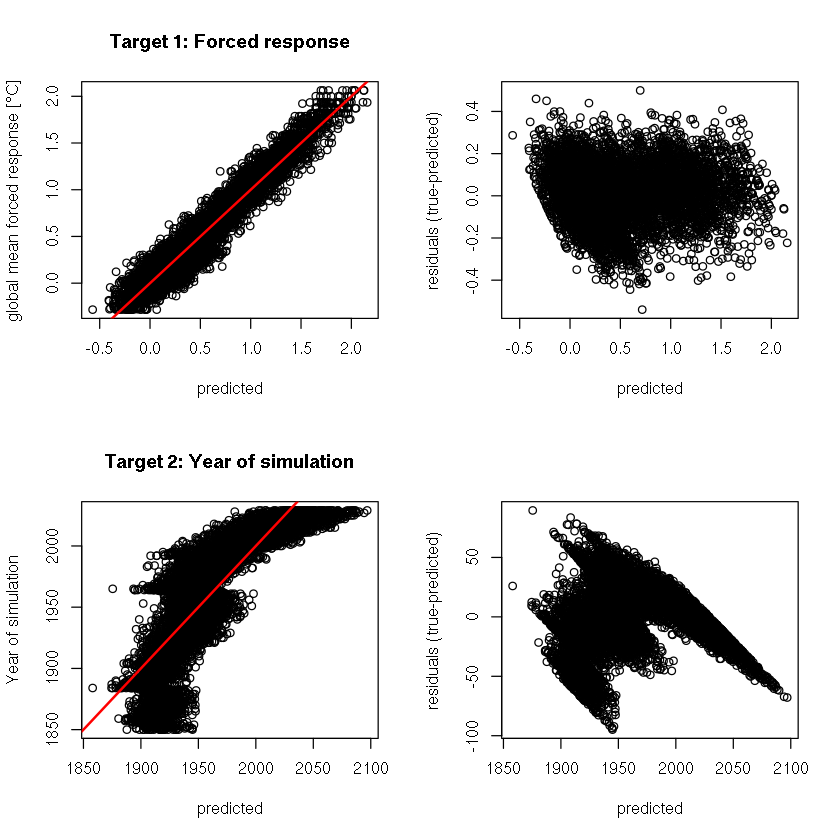

In [11]:
########################################################################
## 1.c. Visualize my predictions:
########################################################################

# upper row: predictions of global mean temperature forced response
# lower row: predictions of the year from which simulations comes
par(mfrow=c(2,2))
plot(my.OLS.pred, LENS_tas_ann_train$Y$fraw, xlab = "predicted", ylab = "global mean forced response [°C]", main = "Target 1: Forced response")
abline(0, 1, col = "red", lwd = 2)
plot(my.OLS.pred, LENS_tas_ann_train$Y$fraw - my.OLS.pred, xlab = "predicted", ylab = "residuals (true-predicted)")

plot(my.OLS2.pred, LENS_tas_ann_train$Y$year, xlab = "predicted", ylab = "Year of simulation", main = "Target 2: Year of simulation")
abline(0, 1, col = "red", lwd = 2)
plot(my.OLS2.pred, LENS_tas_ann_train$Y$year - my.OLS2.pred, xlab = "predicted", ylab = "residuals (true-predicted)")

In [12]:
########################################################################
## 1.d. Derive predictions for unssen test dataset.
########################################################################


my.OLS.fraw.pred = predict(object = my.OLS.mod, newdata = data.frame(X = LENS_tas_ann_test$X[,grid.ix]))
my.OLS.year.pred = predict(object = my.OLS2.mod, newdata = data.frame(X = LENS_tas_ann_test$X[,grid.ix]))

# save my predictions:
# save(c("my.OLS.fraw.pred", "my.OLS.year.pred"), file = "groupX.prediction.RData")

## Now it's your turn!

In [21]:
########################################################################
## 2.a.0 Inspect the data by Chenwei Xiao
########################################################################
# str(LENS_tas_ann_train)
# # LENS_tas_ann_train$M$year %>% unique() %>% sort()
# LENS_tas_ann_train$M$modcl %>% unique()

# head(LENS_tas_ann_train$M)

# aggregate(LENS_tas_ann_train$M$ens.mem,by=list(LENS_tas_ann_train$M$modcl), unique)
# aggregate(LENS_tas_ann_train$M$year,by=list(LENS_tas_ann_train$M$modcl), function(x){length(unique(x))})

## For six model groups, each has 10 ensemble members under rcp85 scenario, with different year range from 80yrs to 180yrs.

## grids overview
lon <- LENS_tas_ann_train$coord$x %>% unique() %>% sort() # 5 degree resolution: 72 levels
lat <-LENS_tas_ann_train$coord$y %>% unique() %>% sort() # 5 degree resolution: 36 levels

# cat('lon:',lon,'\n')
# cat('lat:',lat)


 num [1:9100, 1:2592] 0.0354 -0.6857 0.3523 0.9861 1.3746 ...


[1] "matrix" "array"

'data.frame':	9100 obs. of  4 variables:
 $ AGMT: num  0.1629 0.2134 0.1824 -0.0548 0.045 ...
 $ fraw: num  0.233 0.26 0.255 0.229 0.207 ...
 $ fl  : num  0.298 0.277 0.257 0.239 0.222 ...
 $ year: num  1950 1951 1952 1953 1954 ...


,AGMT,fraw,fl,year
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.16290868,0.2331658,0.2976516,1950
2,0.21339686,0.2597995,0.2766867,1951
3,0.18237751,0.2552939,0.2571062,1952
4,-0.05476518,0.2289685,0.2389338,1953
5,0.04497853,0.2074831,0.2221935,1954
6,0.21645075,0.2441052,0.2069091,1955


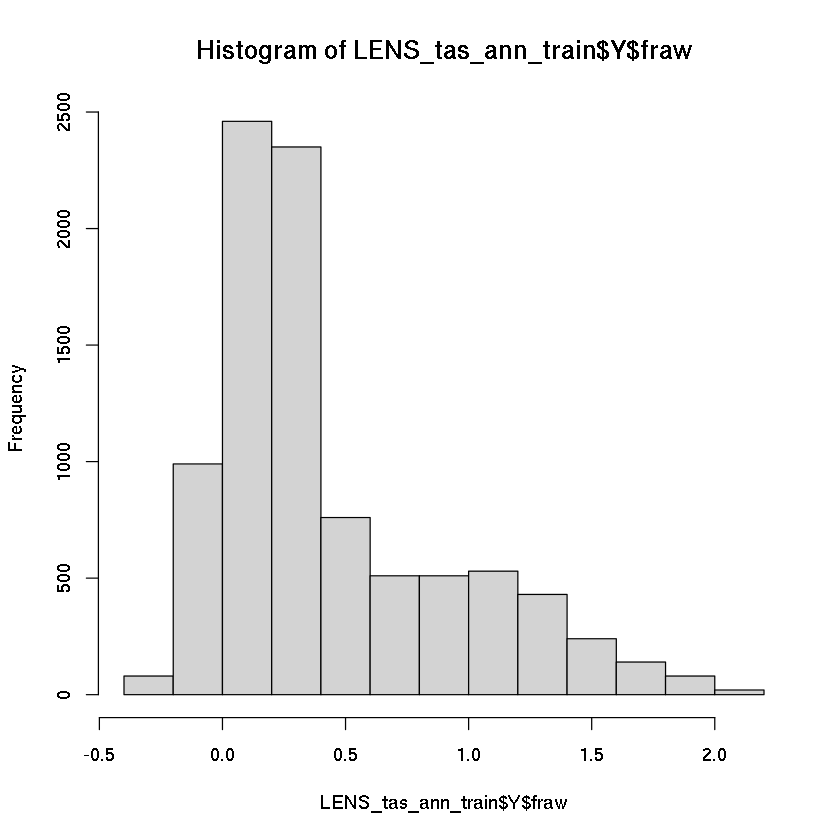

In [14]:
########################################################################
## 2.a.1 Inspect features and outcome variables by Chenwei Xiao
########################################################################

## Feature set X:
## A total of 9100 = model*ens*yr values for 2592 grid points around the world.
## Here we treat as 9100 records and 2592 features => too many features, require feature selection.
str(LENS_tas_ann_train$X)
class(LENS_tas_ann_train$X)

## Outcome set Y:
## 9100 records and 2 outcome variables we need to predict: fraw and year.
str(LENS_tas_ann_train$Y)
head(LENS_tas_ann_train$Y)

## Distribution of fraw => mainly positive response, global warming
hist(LENS_tas_ann_train$Y$fraw)

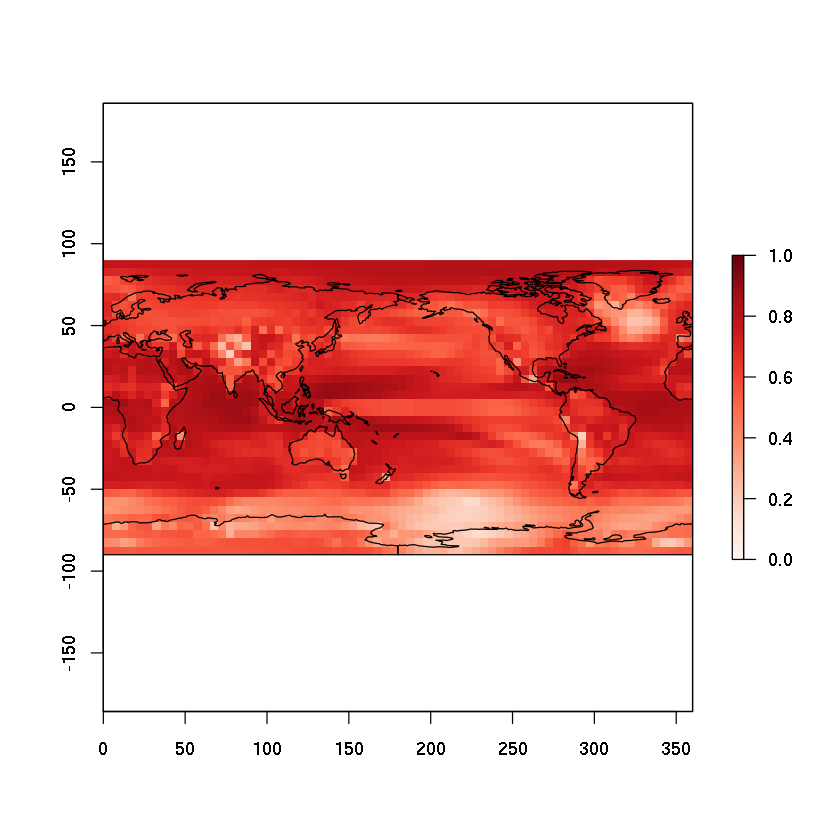

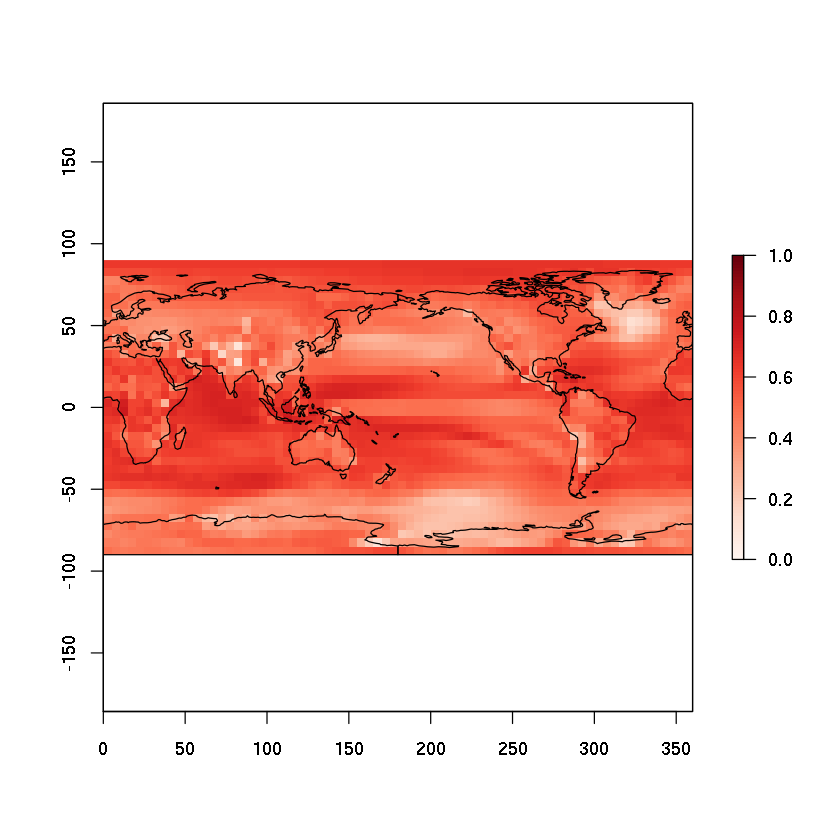

In [15]:
# Correlations between each grid cell and the target "forced response"
mar.cor.fraw = apply(X = LENS_tas_ann_train$X, MARGIN=2, FUN=function(x) cor(x, LENS_tas_ann_train$Y$fraw))
# no negative correlation
plot.mar.cor <- raster.template 
values(plot.mar.cor) = c(matrix(mar.cor.fraw, 72, 36)[,36:1])
plot(plot.mar.cor, col = col.r, zlim = c(0,1))
lines(land.polygon)
                
# Correlations between each grid cell and the target "year" 
mar.cor.year = apply(X = LENS_tas_ann_train$X, MARGIN=2, FUN=function(x) cor(x, LENS_tas_ann_train$Y$year))
# no negative correlation
plot.mar.cor <- raster.template 
values(plot.mar.cor) = c(matrix(mar.cor.year, 72, 36)[,36:1])
plot(plot.mar.cor, col = col.r, zlim = c(0,1))
lines(land.polygon)

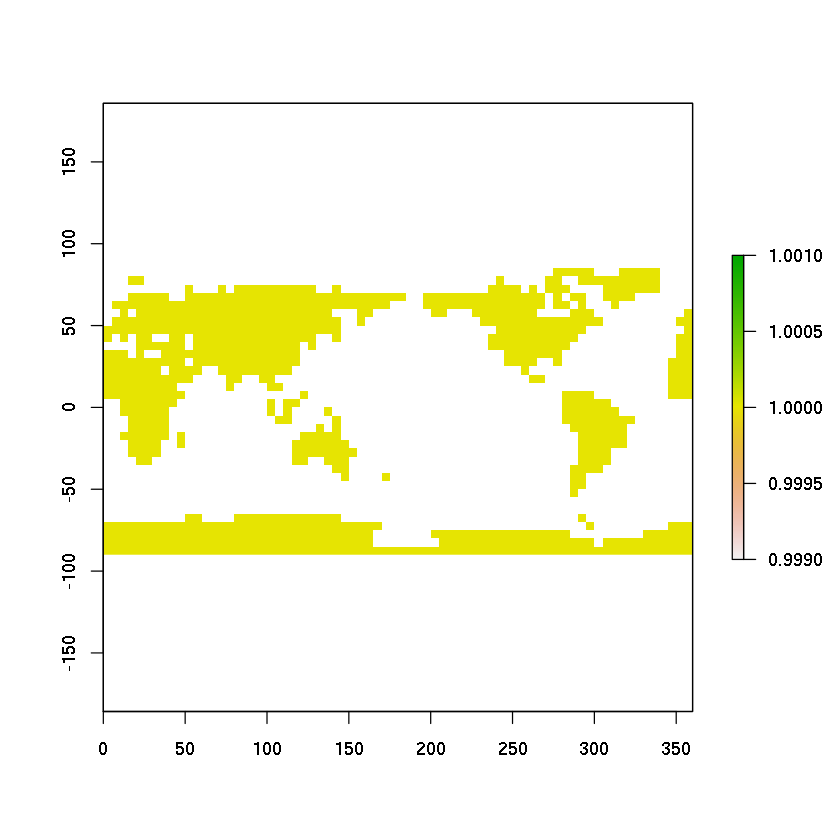

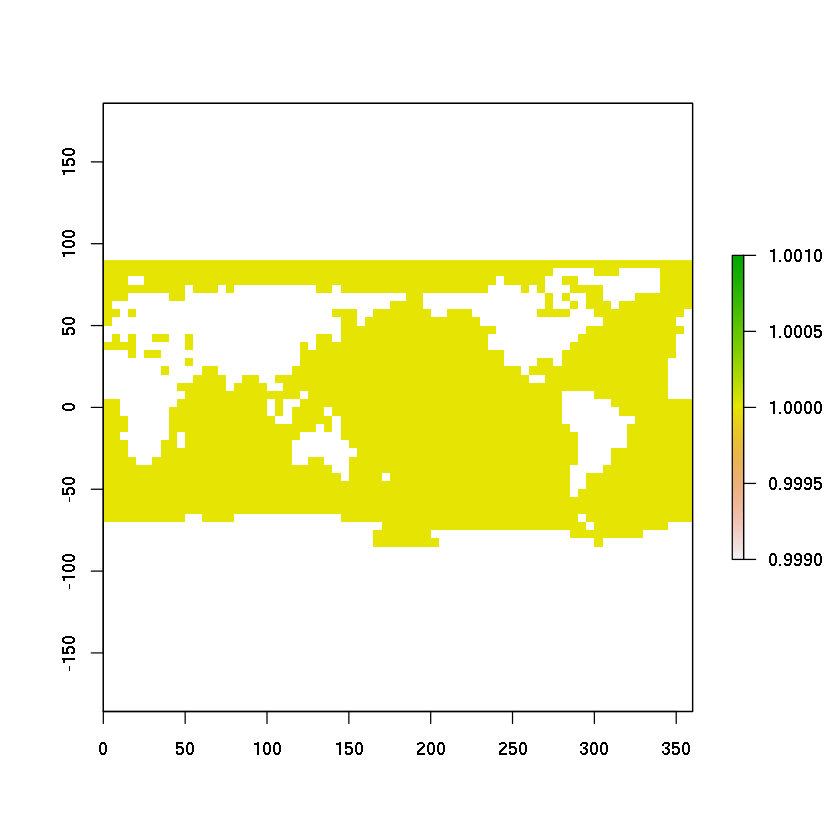

In [16]:
plot.land <- raster.template 
values(plot.land) = c(matrix(1, 72, 36))
masked <- mask(x = plot.land, mask = land.polygon)
plot(masked)

land_mask_array <- c(matrix(values(masked), 72, 36)[,36:1])
ocean_mask_array <- land_mask_array
ocean_mask_array[is.na(ocean_mask_array)] <- 0
ocean_mask_array[ocean_mask_array==1]<- NA
ocean_mask_array[ocean_mask_array==0]<- 1

values(masked) = c(matrix(ocean_mask_array, 72, 36)[,36:1])
plot(masked)

### Some ideas for feature engineering
 1. calculate zonal mean values for prediction of fraw (2592 => 36 features)
 2. calculate different region means (considering the continental as well as zonal positions): sea average and land average temperatures for each latitudes between [-60,60].


In [7]:
########################################################################
## 2.b. Preprocessing
########################################################################

X.train <- LENS_tas_ann_train$X
str(X.train)

mean_rmNA <- function(x){
    return (mean(x,na.rm=T))
}

zonal_mean <- function(x){
    X.zonal <- aggregate(x,by = list(LENS_tas_ann_train$coord$y),mean)
    return (X.zonal$x)
}

land_zonal_mean <- function(x){
    X.zonal <- aggregate(x*land_mask_array,by = list(LENS_tas_ann_train$coord$y),mean_rmNA)
    return (X.zonal$x[7:30])
}

ocean_zonal_mean <- function(x){
    X.zonal <- aggregate(x*ocean_mask_array,by = list(LENS_tas_ann_train$coord$y),mean_rmNA)
    return (X.zonal$x[7:30])
}

 num [1:9100, 1:2592] 0.0354 -0.6857 0.3523 0.9861 1.3746 ...


In [8]:
X.train.zonal <- apply(X.train,1,FUN = zonal_mean)
X.train.land.zonal <- apply(X.train,1,FUN = land_zonal_mean)
X.train.ocean.zonal <- apply(X.train,1,FUN = ocean_zonal_mean)
# remove columns with NAs
X.train.zonal <- t(na.omit(X.train.zonal))
X.train.land.zonal <- t(na.omit(X.train.land.zonal))
X.train.ocean.zonal <- t(na.omit(X.train.ocean.zonal))

#str
str(X.train.zonal)
str(X.train.land.zonal)
str(X.train.ocean.zonal)

In [16]:
# Generate El NINO indices for prediction
nino_idx <- which(LENS_tas_ann_train$coord$y >=-5 & LENS_tas_ann_train$coord$y <=5 & LENS_tas_ann_train$coord$x >=190 & LENS_tas_ann_train$coord$x <=240)

ninoA_idx <- which(LENS_tas_ann_train$coord$y >=-10 & LENS_tas_ann_train$coord$y <=10 & LENS_tas_ann_train$coord$x >=165 & LENS_tas_ann_train$coord$x <=220)
ninoB_idx <- which(LENS_tas_ann_train$coord$y >=-15 & LENS_tas_ann_train$coord$y <=5 & LENS_tas_ann_train$coord$x >=250 & LENS_tas_ann_train$coord$x <=290)
ninoC_idx <- which(LENS_tas_ann_train$coord$y >=-10 & LENS_tas_ann_train$coord$y <=20 & LENS_tas_ann_train$coord$x >=125 & LENS_tas_ann_train$coord$x <=145)

areawA <- LENS_tas_ann_train$coord$areaw[ninoA_idx]/sum(LENS_tas_ann_train$coord$areaw[ninoA_idx])
areawB <- LENS_tas_ann_train$coord$areaw[ninoB_idx]/sum(LENS_tas_ann_train$coord$areaw[ninoB_idx])
areawC <- LENS_tas_ann_train$coord$areaw[ninoC_idx]/sum(LENS_tas_ann_train$coord$areaw[ninoC_idx])

# NINO 3.4 index: lat(-5,5);lon(190,240)
NINO34 <- apply(LENS_tas_ann_train$X[,nino_idx],1,mean)

# NINO Modoki
NINO_modoki <- apply(LENS_tas_ann_train$X[,ninoA_idx]*areawA,1,mean) - 0.5*apply(LENS_tas_ann_train$X[,ninoB_idx]*areawB,1,mean) - 0.5*apply(LENS_tas_ann_train$X[,ninoC_idx]*areawC,1,mean)

In [44]:
#save(X.train.zonal,X.train.land.zonal,X.train.ocean.zonal,NINO34,NINO_modoki, file='Features_processed.RData')
load('Features_processed.RData')

In [45]:
# Merge all the features
X.train.all <- cbind(X.train.zonal,X.train.land.zonal,X.train.ocean.zonal,NINO34,NINO_modoki)
str(X.train.all)

 num [1:9100, 1:85] 0.696 0.196 0.626 0.874 1.408 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:85] "" "" "" "" ...


In [46]:
########################################################################
## 2.c. Split into train/validation set
########################################################################
## Read target data
y1.train <- LENS_tas_ann_train$Y$fraw
y2.train <- LENS_tas_ann_train$Y$year
str(y1.train)
str(y2.train)

## split into train/validation set
#We can set a seed for reproducible results.
set.seed(0)

#Shuffle the data
shuffled_id <- sample(x=1:nrow(X.train.all),size = nrow(X.train.all),replace = FALSE)
X.train.all <- X.train.all[shuffled_id,]
y1.train <- y1.train[shuffled_id]
y2.train <- y2.train[shuffled_id]

#Make a breakpoint at 80%
train_idx <- 1:as.integer(0.8 * nrow(X.train.all))

#Use this breakpoint to delineate the training data from the test data
X_train <- X.train.all[train_idx,]
y1_train <- y1.train[train_idx]
y2_train <- y2.train[train_idx]
str(X_train)
str(y1_train)
str(y2_train)
#Past the breakpoint is the test data
X_test <- X.train.all[-train_idx,]
y1_test <- y1.train[-train_idx]
y2_test <- y2.train[-train_idx]
str(X_test)
str(y1_test)
str(y2_test)

 num [1:9100] 0.233 0.26 0.255 0.229 0.207 ...
 num [1:9100] 1950 1951 1952 1953 1954 ...
 num [1:7280, 1:85] 2.1515 1.7708 1.0806 0.1911 0.0254 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:85] "" "" "" "" ...
 num [1:7280] 1.3237 1.1144 0.0446 0.2172 0.0549 ...
 num [1:7280] 2026 2013 1914 1931 1869 ...
 num [1:1820, 1:85] 0.0538 1.7139 0.8282 0.7582 1.0096 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:85] "" "" "" "" ...
 num [1:1820] -0.011 0.496 0.191 0.156 0.342 ...
 num [1:1820] 1965 1982 1929 1984 1938 ...


In [22]:
# head(X_train)

In [48]:
########################################################################
## 2.d. Lasso Regression
########################################################################

## some exploratory regression for fraw

## multi-linear
## for fraw prediction
glm.fit <- glmnet(y=y1_train, x=data.matrix(X_train),
                  family = "gaussian", alpha = 1, lambda=0)

y1_pred <- predict(glm.fit, X_test)
cat("The simple glm model for fraw prediction:")
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y1_pred, y1_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y1_pred, y1_test))

## for year prediction
glm.fit2 <- glmnet(y=y2_train, x=data.matrix(X_train),
                  family = "gaussian", alpha = 1, lambda=0)

y2_pred <- predict(glm.fit2, X_test) %>% round() ## round to predict integer year
cat("The simple glm model for year prediction:")
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y2_pred, y2_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y2_pred, y2_test))

## already very good performance


The simple glm model for fraw prediction:

[1] "R2 value of prediction on test dataset: 0.97298"

[1] "MSE value of prediction on test dataset: 0.00613"

The simple glm model for year prediction:

[1] "R2 value of prediction on test dataset: 0.75702"

[1] "MSE value of prediction on test dataset: 543.36154"

[1] "Time cost for training: 0.60245 s"

[1] "Best lasso penalty coefficient: 1.000e-08"

[1] "R2 value of prediction on test dataset: 0.97300"

[1] "MSE value of prediction on test dataset: 0.00612"

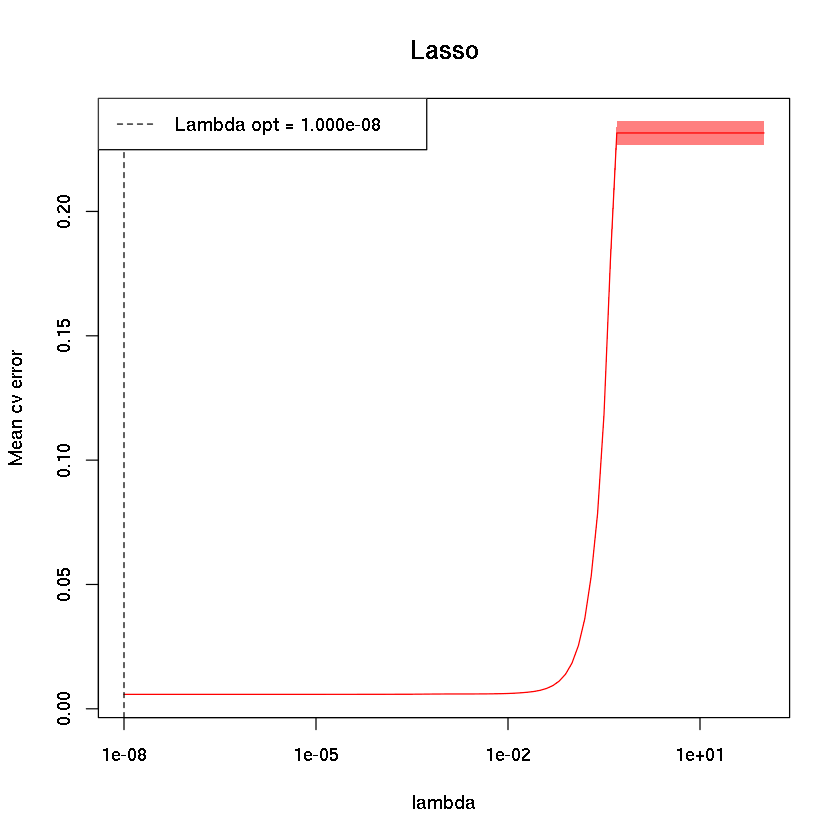

In [56]:
## Lasso
lambda_exponent <- seq(-8,2,length.out=101)
lambda_vec      <- 10^lambda_exponent

start.time <- Sys.time()

lasso.model <- cv.glmnet(x = X_train, y = y1_train, family="gaussian", alpha = 1,
          nfolds = 10, standardize = T, lambda=lambda_vec)

end.time <- Sys.time()
time.lasso <- end.time - start.time

sprintf("Time cost for training: %.5f s",
        time.lasso)

## Plot mean cross-validated error for lasso model
plot(lasso.model$lambda, lasso.model$cvm, type="l", log="x",col="red",
     ylab="Mean cv error", xlab="lambda", main="Lasso",
     ylim=c(min(lasso.model$cvlo),max(lasso.model$cvup)))
polygon(c(lasso.model$lambda,rev(lasso.model$lambda)),
        c(lasso.model$cvlo,rev(lasso.model$cvup)),
        col=rgb(1,0,0,0.5),border=NA)
abline(v=lasso.model$lambda[which.min(lasso.model$cvm)],lty="dashed")
legend("topleft",legend=sprintf("Lambda opt = %.3e", lasso.model$lambda[which.min(lasso.model$cvm)]),
       lty="dashed")

sprintf('Best lasso penalty coefficient: %.3e', lasso.model$lambda[which.min(lasso.model$cvm)]) ## almost 0 here

y1_pred <- predict(lasso.model, X_test, "lambda.min")
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y1_pred, y1_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y1_pred, y1_test))

## even better performance for glm without regularization

[1] "Time cost for training: 0.70143 s"

[1] "Best lasso penalty coefficient: 1.000e-08"

[1] "The Lasso model:"

[1] "R2 value of prediction on test dataset: 0.75756"

[1] "MSE value of prediction on test dataset: 542.16923"

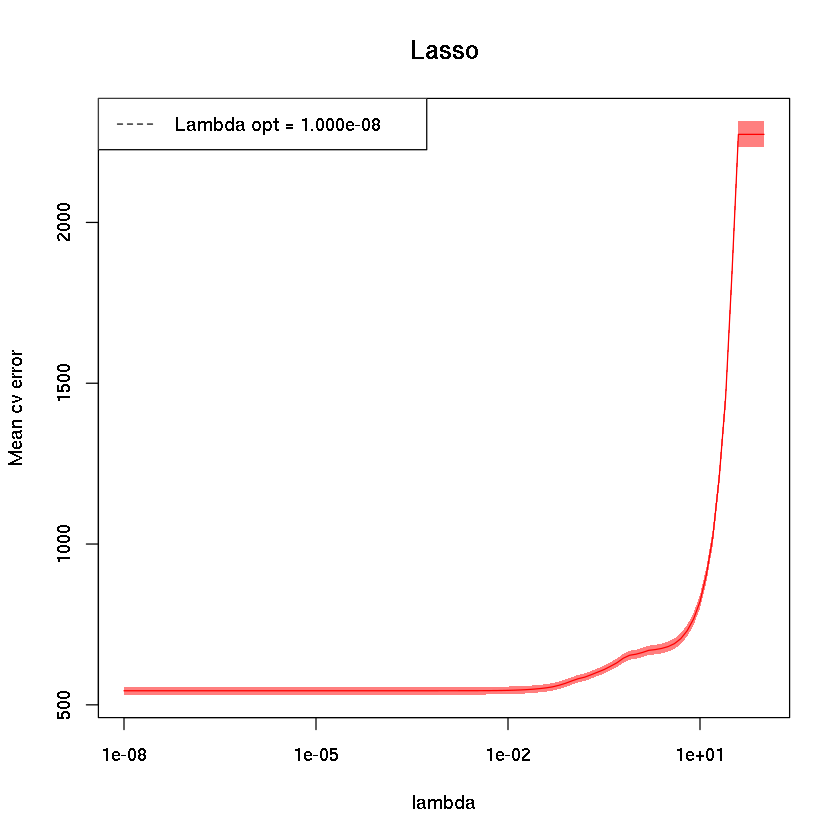

In [50]:
## for y2(year) try to use regression method instead of classification
start.time <- Sys.time()

lasso.model2 <- cv.glmnet(x = X_train, y = y2_train, family="gaussian", alpha = 1,
                         nfolds = 10, standardize = T, lambda=lambda_vec)

end.time <- Sys.time()
time.lasso2 <- end.time - start.time

sprintf("Time cost for training: %.5f s",
        time.lasso2)

## Plot mean cross-validated error for lasso model
plot(lasso.model2$lambda, lasso.model2$cvm, type="l", log="x",col="red",
     ylab="Mean cv error", xlab="lambda", main="Lasso",
     ylim=c(min(lasso.model2$cvlo),max(lasso.model2$cvup)))
polygon(c(lasso.model2$lambda,rev(lasso.model2$lambda)),
        c(lasso.model2$cvlo,rev(lasso.model2$cvup)),
        col=rgb(1,0,0,0.5),border=NA)
legend("topleft",legend=sprintf("Lambda opt = %.3e", lasso.model2$lambda[which.min(lasso.model2$cvm)]),
       lty="dashed")

sprintf('Best lasso penalty coefficient: %.3e', lasso.model2$lambda[which.min(lasso.model2$cvm)]) ## almost 0 here ## almost 0 here, not much diff from glm

y2_pred <- predict(lasso.model2, X_test, "lambda.min") %>% round()
sprintf('The Lasso model:')
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y2_pred, y2_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y2_pred, y2_test))

## only minor improvement of performance than simple glm without regularization

In [51]:
# save the lasso model
save(lasso.model,lasso.model2,file = 'Lasso_Model.RData')


In [22]:
########################################################################
## 3.a. Boosted trees 
########################################################################

## prepare dataframe for training and test
df_train <-data.frame(X_train, y1 = y1_train, y2 = y2_train)
df_test <- data.frame(X_test)

head(df_train)
head(df_test)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V78,V79,V80,V81,V82,V83,NINO34,NINO_modoki,y1,y2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.15146807,1.6844316,1.6626743,2.0633896,1.9608844,1.7956235,1.087828659,0.85970210,0.97225178,1.09603349,⋯,0.88724018,1.01988647,0.93128262,0.8567501,0.412749052,0.89569966,-0.12251877,-0.0260747009,1.323743828,2026
2,1.77077423,1.9434816,1.8861758,1.5016657,0.9224219,0.5398878,0.347367689,0.41034201,0.65102176,0.78833947,⋯,0.95761149,0.95441500,1.24377440,1.5931159,1.520700158,1.90558284,2.34803563,0.0019630852,1.114424683,2013
3,1.08059526,0.4821268,0.2122287,0.2694298,0.1355385,-0.1843483,-0.115139573,0.02089877,0.08867732,0.08559227,⋯,-0.03927495,-0.00328957,0.17390868,0.1956014,0.005440423,0.08316279,-0.00200502,0.0004866555,0.044568380,1914
4,0.19110237,0.2471962,-0.2345007,-0.6323417,-0.6056424,-0.1773833,-0.005354055,0.06133239,0.15871727,0.19049926,⋯,0.23433181,0.15072238,0.04388261,0.4245290,0.477534218,0.55671868,0.39607182,0.0009725944,0.217163233,1931
5,0.02543389,-0.1198502,-0.1402432,-0.5016131,-0.3502942,0.1508106,0.164394661,0.01698829,-0.08424461,-0.13577970,⋯,0.08527818,0.06035408,0.20247314,0.1271761,0.043441850,-0.01767516,0.08765715,-0.0040349999,0.054932562,1869
6,0.49858689,0.1341724,-0.1985559,-0.3377400,-0.3448009,-0.1654891,-0.100169627,-0.13610278,-0.11505253,-0.09927277,⋯,0.01222269,-0.07007154,-0.32746765,-0.3895314,-0.071504009,-0.09768057,-0.33637142,0.0071718273,0.009818876,1898


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,NINO34,NINO_modoki
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.05380916,-0.28273085,-0.3028078,0.2380258,-0.1627930,-0.06204242,0.0258952,0.008889772,-0.06883240,-0.15176694,⋯,0.172137408,0.32568694,0.23963965,0.03508079,0.07334870,0.3965623,0.5799833,0.7125220,-0.1773309,0.0036495623
2,1.71394711,0.77260226,0.3490704,0.3696443,0.6762255,0.43698297,0.3535191,0.400181773,0.34827212,0.23880732,⋯,0.515638323,0.60740051,0.62581784,0.68814150,0.46057375,0.3332647,0.5590420,1.0322072,0.5278193,0.0024570355
3,0.82821319,0.62271687,0.6037049,0.7534156,0.5530076,0.36034189,0.1908515,0.068342954,-0.06657281,-0.17731639,⋯,0.393810244,0.09867546,-0.01601769,-0.07898420,-0.06740345,0.2597035,0.7148084,0.7378267,0.2362970,-0.0108095825
4,0.75821835,0.02147622,0.2603483,0.5605642,0.2085380,0.36607419,0.1110661,0.081166466,0.20715320,0.21661692,⋯,-0.140555363,-0.05833605,-0.07260813,-0.18211929,-0.57829000,-0.4737888,-0.3970102,-0.3982397,-0.6952010,-0.0002292848
5,1.00955818,0.93682133,0.8831864,0.9438310,1.2107255,1.02720722,0.6006252,0.430561233,0.29745909,0.24556033,⋯,0.178298797,0.31932165,0.40533274,0.47169517,0.55002464,0.6654668,0.8022321,0.6924177,-0.3805435,-0.0062841175
6,-0.41147017,0.02748312,0.4690301,0.3625938,0.5442129,0.57195913,0.4025835,0.168846298,0.06251697,0.08496835,⋯,0.003160324,0.01909046,0.05586287,0.13210624,0.20115098,0.3072603,0.2930064,0.5374908,-0.2493881,-0.0010014735


[1] "Time cost for training: 1.27988 s"

[1] "Optimal number of trees: 132"

[1] "The Boosted Trees model for prediction of fraw:"

[1] "R2 value of prediction on test dataset: 0.96984"

[1] "MSE value of prediction on test dataset: 0.00686"

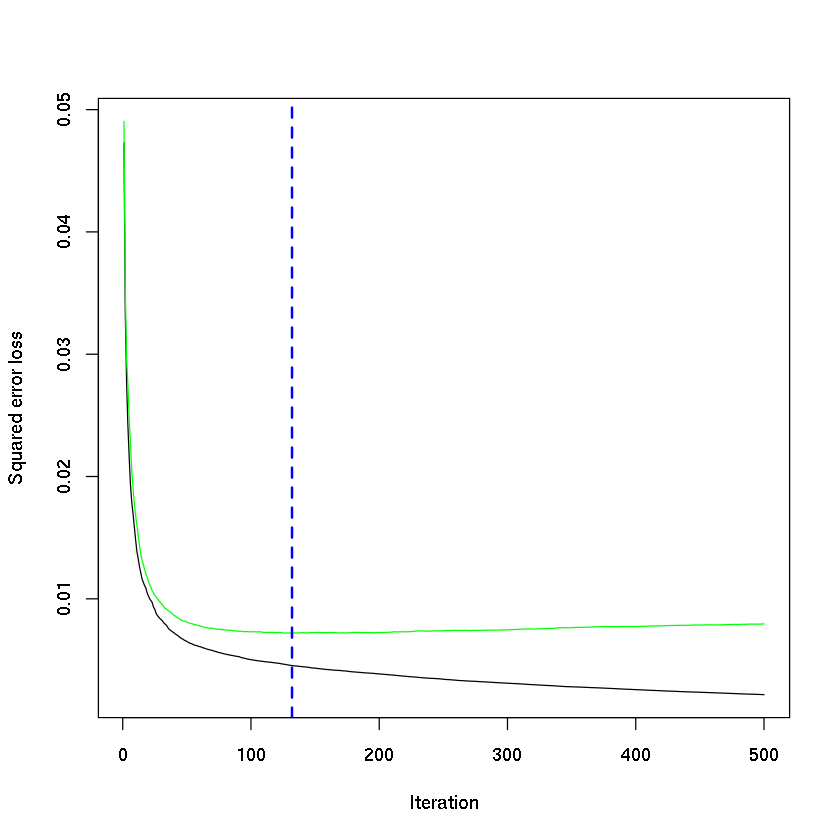

In [131]:
## Decide on function settings:
## Choose shrinkage_par as 1:
distribution_set  <- "gaussian" ## For squared error loss (for regression problem)
n_trees           <- 500          ## Number of trees
interaction_depth <- 2          ## Tree size (number of splits)
shrinkage_par     <- 1          ## "Regularisation"

## Find optimal number of trees with the following function:
start.time <- Sys.time()

gbm.fitted <- gbm(
    y1 ~ . - y2, data=df_train, distribution=distribution_set,
    n.tree=n_trees, interaction.depth=interaction_depth,
    shrinkage=shrinkage_par, bag.fraction=1, cv=10
    )

best.n.tree <- gbm.perf(gbm.fitted,method="cv")
sprintf("Optimal number of trees: %i", best.n.tree)

end.time <- Sys.time()
time.gbm <- end.time - start.time

sprintf("Time cost for training: %.5f s",
        time.gbm)

y1_pred <- predict(gbm.fitted,newdata=df_test,n.tree=best.n.tree) ## choose best n_tree

sprintf('The Boosted Trees model for prediction of fraw:')
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y1_pred, y1_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y1_pred, y1_test))

[1] "Optimal number of trees: 1494"

[1] "Time cost for training: 2.04074 s"

[1] "The Boosted Trees model for prediction of fraw:"

[1] "R2 value of prediction on test dataset: 0.97463"

[1] "MSE value of prediction on test dataset: 0.00575"

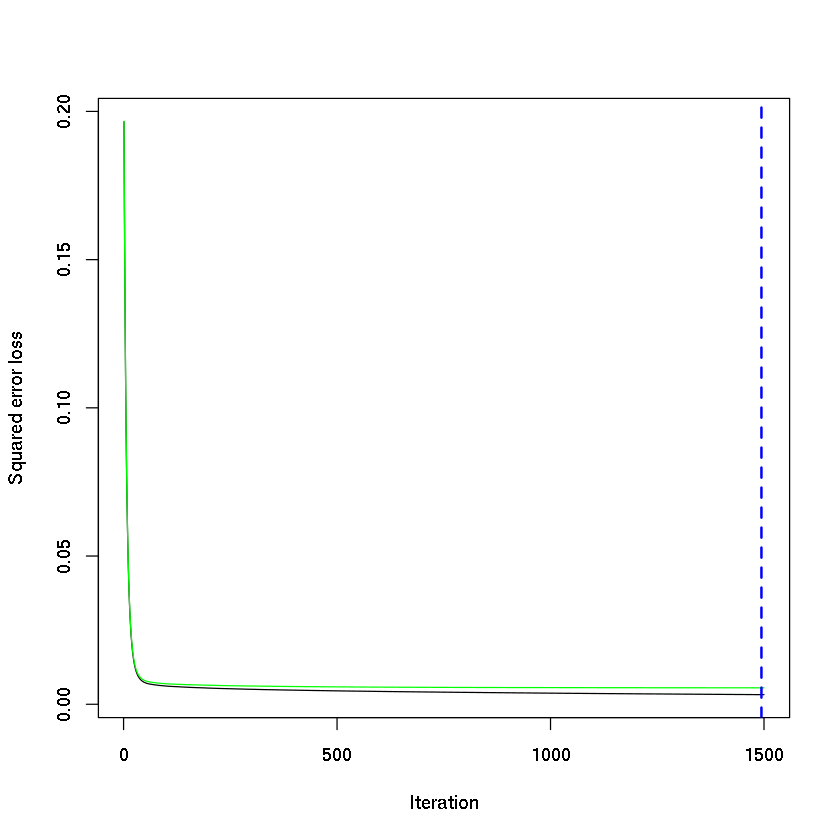

In [23]:
## Choose shrinkage_par as 0.1:
distribution_set  <- "gaussian" ## For squared error loss (for regression problem)
n_trees           <- 1500          ## Number of trees
interaction_depth <- 2          ## Tree size (number of splits)
shrinkage_par     <- 0.1          ## "Regularisation"

## Find optimal number of trees with the following function:
start.time <- Sys.time()

gbm.fitted <- gbm(
    y1 ~ . - y2, data=df_train, distribution=distribution_set,
    n.tree=n_trees, interaction.depth=interaction_depth,
    shrinkage=shrinkage_par, bag.fraction=1, cv=10
    )

best.n.tree.1 <- gbm.perf(gbm.fitted,method="cv")
sprintf("Optimal number of trees: %i", best.n.tree.1) 

end.time <- Sys.time()
time.gbm <- end.time - start.time

sprintf("Time cost for training: %.5f s",
        time.gbm)

y1_pred <- predict(gbm.fitted,newdata=df_test,n.tree=best.n.tree.1) ## choose best n_tree as 500

sprintf('The Boosted Trees model for prediction of fraw:')
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y1_pred, y1_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y1_pred, y1_test))

[1] "Time cost for training: 1.30743 s"

[1] "Optimal number of trees: 63"

[1] "The Boosted Trees model for prediction of year:"

[1] "R2 value of prediction on test dataset: 0.81212"

[1] "MSE value of prediction on test dataset: 423.21209"

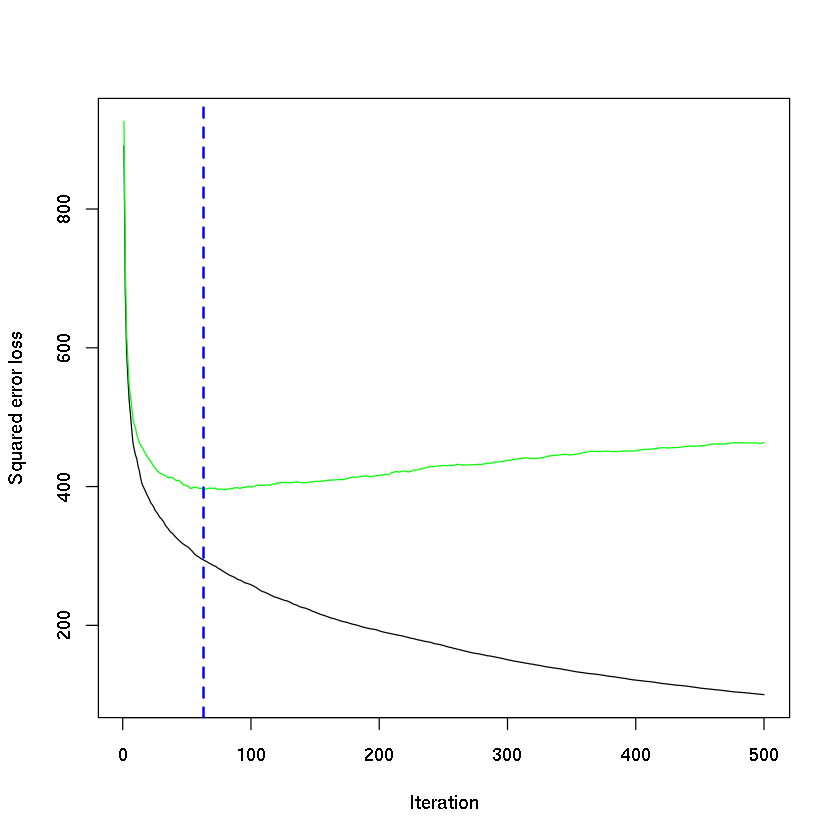

In [136]:
## for y2 (years)
## choose shrinkage parameter as 1

distribution_set  <- "gaussian" ## For squared error loss (for regression problem)
n_trees           <- 500          ## Number of trees
interaction_depth <- 2          ## Tree size (number of splits)
shrinkage_par     <- 1          ## "Regularisation"

## Find optimal number of trees with the following function:
start.time <- Sys.time()

gbm.fitted2 <- gbm(
    y2 ~ . - y1, data=df_train, distribution=distribution_set,
    n.tree=n_trees, interaction.depth=interaction_depth,
    shrinkage=shrinkage_par, bag.fraction=1, cv=10
)


best.n.tree <- gbm.perf(gbm.fitted2,method="cv")
sprintf("Optimal number of trees: %i", best.n.tree) 

end.time <- Sys.time()
time.gbm2 <- end.time - start.time

sprintf("Time cost for training: %.5f s",
        time.gbm2)

y2_pred <- predict(gbm.fitted2,newdata=df_test,n.tree=best.n.tree) %>% round() ## choose best n_tree

sprintf('The Boosted Trees model for prediction of year:')
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y2_pred, y2_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y2_pred, y2_test))

[1] "Optimal number of trees: 1500"

[1] "Time cost for training: 2.06679 s"

[1] "The Boosted Trees model for prediction of year:"

[1] "R2 value of prediction on test dataset: 0.85714"

[1] "MSE value of prediction on test dataset: 319.27033"

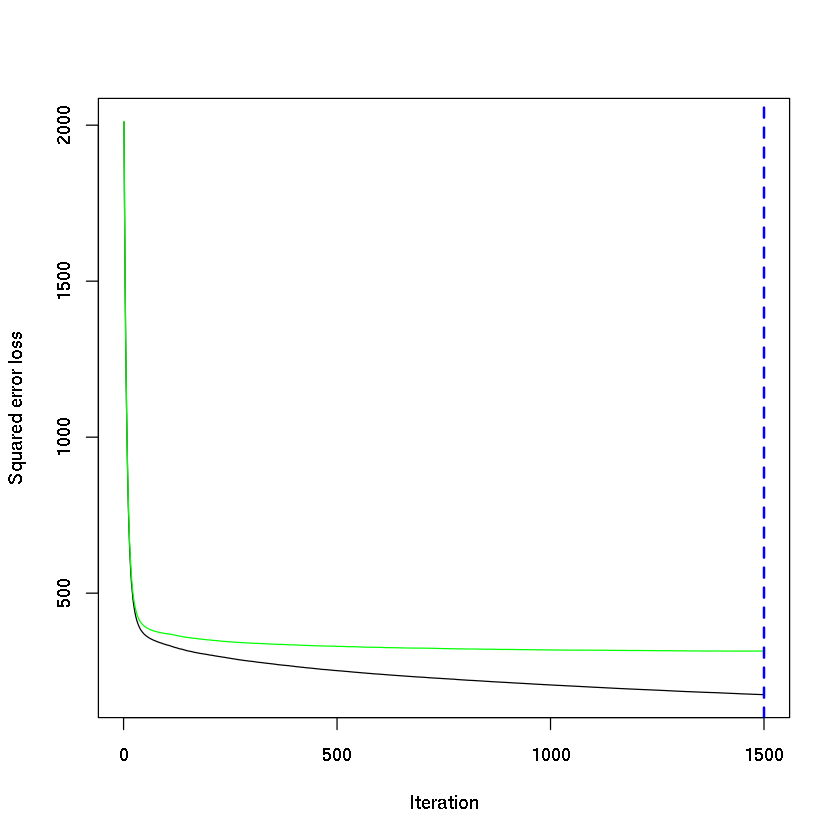

In [24]:
## for y2 (years)
## Decide on function settings:

distribution_set  <- "gaussian" ## For squared error loss (for regression problem)
n_trees           <- 1500          ## Number of trees
interaction_depth <- 2          ## Tree size (number of splits)
shrinkage_par     <- 0.1          ## "Regularisation"

## Find optimal number of trees with the following function:
start.time <- Sys.time()

gbm.fitted2 <- gbm(
    y2 ~ . - y1, data=df_train, distribution=distribution_set,
    n.tree=n_trees, interaction.depth=interaction_depth,
    shrinkage=shrinkage_par, bag.fraction=1, cv=10
)

best.n.tree.2 <- gbm.perf(gbm.fitted2,method="cv")
sprintf("Optimal number of trees: %i", best.n.tree.2) 

end.time <- Sys.time()
time.gbm2 <- end.time - start.time

sprintf("Time cost for training: %.5f s",
        time.gbm2)

y2_pred <- predict(gbm.fitted2,newdata=df_test,n.tree=best.n.tree.2) %>% round() ## choose best n_tree as 500

sprintf('The Boosted Trees model for prediction of year:')
sprintf("R2 value of prediction on test dataset: %.5f",
        cor(y2_pred, y2_test)^2)
sprintf("MSE value of prediction on test dataset: %.5f",
        MSE(y2_pred, y2_test))

In [29]:
## save best performance model
# best.n.tree.1 = 1494
# best.n.tree.2 = 1500
save(gbm.fitted,gbm.fitted2,best.n.tree.1,best.n.tree.2,file = 'Boosted_Trees_Model.RData')

- Summary on Boosted Trees modelling:
    1. Better performance with shrinkage parameter of 0.1 than 1.
    2. Choose the best number of trees with cross-validation method.

In [35]:
## try to do multi-classification for year but failed as there are
## too many classes and training set for each class is small

# distribution_set  <- "multinomial" ## For (for multi-class problem)
# n_trees           <- 150         ## Number of trees
# interaction_depth <- 2          ## Tree size (number of splits)
# shrinkage_par     <- 1          ## "Regularisation"


# df_train$y2 <- as.factor(df_train$y2)
# gbm.fitted3 <- gbm(
#     y2 ~ . - y1, data=df_train,
#     n.tree=n_trees, interaction.depth=interaction_depth,
#     shrinkage=shrinkage_par, bag.fraction=1, cv=10
# )

# gbm.pred <- predict(gbm.fitted3, df_test, n.trees=150, type="response")
# gbm.pred <- data.frame(gbm.pred)
# #names(gbm.pred) <- c()

# gbm.pred <- as.factor(colnames(gbm.pred)[max.col(gbm.pred)]) ##!
#confusionMatrix(gbm.pred, valid.iris$Species)$overall

# not works here (too many classes and training set for each class is small)

Distribution not specified, assuming multinomial ...


Warning message:
“Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk.”


In [78]:
##########################################################################
## 4. Prediction on the test set
##########################################################################
# Preprocess X_test
X.test <- LENS_tas_ann_test$X
str(X.test)

X.test.zonal <- apply(X.test,1,FUN = zonal_mean)
X.test.land.zonal <- apply(X.test,1,FUN = land_zonal_mean)
X.test.ocean.zonal <- apply(X.test,1,FUN = ocean_zonal_mean)
# remove columns with NAs
X.test.zonal <- t(na.omit(X.test.zonal))
X.test.land.zonal <- t(na.omit(X.test.land.zonal))
X.test.ocean.zonal <- t(na.omit(X.test.ocean.zonal))

# Generate El NINO indices for prediction
nino_idx <- which(LENS_tas_ann_train$coord$y >=-5 & LENS_tas_ann_train$coord$y <=5 & LENS_tas_ann_train$coord$x >=190 & LENS_tas_ann_train$coord$x <=240)

ninoA_idx <- which(LENS_tas_ann_train$coord$y >=-10 & LENS_tas_ann_train$coord$y <=10 & LENS_tas_ann_train$coord$x >=165 & LENS_tas_ann_train$coord$x <=220)
ninoB_idx <- which(LENS_tas_ann_train$coord$y >=-15 & LENS_tas_ann_train$coord$y <=5 & LENS_tas_ann_train$coord$x >=250 & LENS_tas_ann_train$coord$x <=290)
ninoC_idx <- which(LENS_tas_ann_train$coord$y >=-10 & LENS_tas_ann_train$coord$y <=20 & LENS_tas_ann_train$coord$x >=125 & LENS_tas_ann_train$coord$x <=145)

areawA <- LENS_tas_ann_train$coord$areaw[ninoA_idx]/sum(LENS_tas_ann_train$coord$areaw[ninoA_idx])
areawB <- LENS_tas_ann_train$coord$areaw[ninoB_idx]/sum(LENS_tas_ann_train$coord$areaw[ninoB_idx])
areawC <- LENS_tas_ann_train$coord$areaw[ninoC_idx]/sum(LENS_tas_ann_train$coord$areaw[ninoC_idx])

# NINO 3.4 index: lat(-5,5);lon(190,240)
NINO34 <- apply(LENS_tas_ann_test$X[,nino_idx],1,mean)

# NINO Modoki
NINO_modoki <- apply(LENS_tas_ann_test$X[,ninoA_idx]*areawA,1,mean) - 0.5*apply(LENS_tas_ann_test$X[,ninoB_idx]*areawB,1,mean) - 0.5*apply(LENS_tas_ann_test$X[,ninoC_idx]*areawC,1,mean)

# Merge all the features
X.test.all <- cbind(X.test.zonal,X.test.land.zonal,X.test.ocean.zonal,NINO34,NINO_modoki)
str(X.test.all)



 num [1:4550, 1:2592] -0.379 1.074 1.192 0.989 1.576 ...
 num [1:4550, 1:85] -0.608 2.125 1.113 0.645 2.684 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:85] "" "" "" "" ...


In [81]:
#save(X.test.all,file = 'X_test_processed_features.RData')
load('X_test_processed_features.RData')
load('Boosted_Trees_Model.RData')
load('Lasso_Model.RData')

In [82]:
str(X.test.all)

 num [1:4550, 1:85] -0.608 2.125 1.113 0.645 2.684 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:85] "" "" "" "" ...


In [85]:
df_test <- data.frame(X.test.all)
nrow(df_test)

[1] 4550

In [86]:
# use Lasso to predict fraw
fraw_Lasso_test_pred <- predict(lasso.model, X.test.all, "lambda.min")

# use Lasso to predict year
year_Lasso_test_pred <- predict(lasso.model2, X.test.all, "lambda.min") %>% round()

# use Boosted Trees to predict fraw (better performance than Lasso)
fraw_Boosted_Trees_test_pred <- predict(gbm.fitted,newdata=df_test,n.tree=best.n.tree.1)

# use Boosted Trees to predict year (better performance than Lasso)

year_Boosted_Trees_test_pred <- predict(gbm.fitted2,newdata=df_test,n.tree=best.n.tree.2) %>% round() ## choose best n_tree

In [87]:
save(fraw_Lasso_test_pred,year_Lasso_test_pred,
     fraw_Boosted_Trees_test_pred, year_Boosted_Trees_test_pred, file = "group8.prediction.RData")

In [90]:
load("group8.prediction.RData")
str(fraw_Lasso_test_pred)
str(year_Lasso_test_pred)
str(fraw_Boosted_Trees_test_pred)
str(year_Boosted_Trees_test_pred)

 num [1:4550, 1] 0.27 1.03 0.297 0.239 1.098 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "1"
 num [1:4550, 1] 1919 2034 1954 1929 2023 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "1"
 num [1:4550] 0.247 1.009 0.323 0.247 1.173 ...
 num [1:4550] 1931 2020 1963 1939 2017 ...


## Evaluation

Please make sure to carefully answer the following questions in the boxes provided below the answers. A short paragraph (less than 10 lines) for each answer is sufficient.

1.	Describe the two methods: Describe the most important background of your assigned two (linear+nonlinear) methods. <br>

    a.	What is the key idea (that is, theoretical basis) behind your methods?<br>
    b.	In what way, or in which circumstances is it advisable to apply your methods? In which cases may your methods fail?<br>
    c.	How does your methods guard against overfitting?<br>
    d.	Which are the tuning parameters of your methods?



a. The key idea for Lasso regression is to impose a constraint on regression coefﬁcients that minimize the sum of the squared residuals and the absolute value of the regression coefficients, reducing complexity brought by highly penalized coefficients. Boosting improves the weak "learners" iteratively so that model trains at a given step which depends on the models fitted at the previous steps.

b. In general, Lasso applies to regression problems that regularize the large regression coefficient to improve accuracy. It works efficiently when the NO. of observations is relatively smaller compared to the NO.of variables, i.e. when redundant features exist. However, Lasso may not work well when the model contains variables that are necessary but insignificant(represent only a small fraction of candidate variables). Boosting can be used for both regression and classification where the base models have low variances and high bias due to weak learners. It may fail when the NO.of trees is too large or data is noisy, due to increased risk of overfitting. It doesn't work well with outliers due to their large residuals. The model will focus a disproportionate amount of its attention on those points.

c. Lasso applies a regularization parameter on the regression coefficients that are penalized for an added cost function. Therefore, the predictions will have less flexibility or less sensitivity to the training data/redundant variables, i.e., reduced overfitting. Boosting controls the NO. of trees to avoid overfitting. In addition, it applies a shrinkage parameter to control the learning rate to scale the contribution from the new tree. Several small steps of learning are taken towards the ground truth, resulting in better predictions with a testing data set, i.e., lower variance.

d. Lasso: a regularization parameter that minimizes the cost function. For boosting: NO. of trees, interaction depth, and shrinkage parameter controls the learning rate.


2. Describe the data: What is the dataset about? What’s the data source and what does that tell you about the type of the data?



The dataset is about the state of forced climate change from annual temperature maps linked to two target metrics, i.e., the global mean forced temperature response and the year from which a specific annual temperature map originates. The data source is from the climate model LENS and the scenario RCP8.5 (Barnes et al. 2019), and the type of data is in the form of a list containing several matrices and data frames.

3.	Describe the preprocessing: What pre-processing steps have been taken? Which preprocessing tasks did you additionally perform? Did you do any additional feature selection or feature engeineering? Does it yield improvement, if you’d choose more or less predictors? (if so, which?) Please give the arguments both if you did or didn't select any features, and for both your linear and nonlinear method you are implementing.

Firstly, we generate the zonal mean temperature of each record(map), which accounts for 36 features. Considering the higher correlation between global temperature and fraw, year in mid-latitudes and tropical regions, we decide to create more features to represent these regions, so we increase the zonal resolution to land average and ocean average. To improve the predictability of year, two El-NINO indices, El-nino 3.4 and El-nino Modoki are calculated. Their inter-annual variability should contain year information.

We select fewer features in polar regions, as the temperature there correlates worse with fraw and year. Their land areas are also much smaller.

We choose to only use all features generated by us. After feature engineering, 62 features are kept. We decide not to include more to avoid yielding higher complexity of the model and being less general. For training set, it could improve some performance and decrease the bias, but when it comes to testing, a higher variance is induced hence leads to higher error.

For both Lasso and Boosted Trees, we implement the regularization method and cross-validation to choose the best hyperparameters, so we also account for the complexity of models and maintain their generalism. From the cross-validation method for Lasso, we see that it keeps the lowest penalty parameter lambda, which means that our predictors are all important for prediction.

4. Describe your procedure of fitting the model to the data: Description of the fitting procedure: How was data split (CV, train/test-split), and why did you choose this splitting? What hyperparameters did you set and to which values? How did you come up with these values? Please also shortly comment on the expensiveness of your method (how long it takes to fit) and put that in perspective with the precision obtained.

For train/test split, we firstly shuffle the dataset and split it into 80% train set and 20% test set. This is a traditional split when records are enough for training. Here 7280 records are used for training and 1820 records are used for test.
For Lasso regression, there is one hyperparameter: penalty parameter lambda and we set it to the lowest value 1e-8 here. The choice of lambda is based on the cross validation method. We use a cv fold of 10 here and calculate the cross-validation average MSE, choose the corresponding lambda to lowest MSE loss.
For Boosted trees, there are number of trees, number of splits, and shrinkage parameter as 3 hyperparameters in our model. We use cross validation method with 10 folds again to choose the number of trees of best performance.

Train time, precision (R2 and MSE on test set):

| Model         | Response | Train time (s) | R2  | MSE |
|---------------|----------|------------|----------|-----|
| Lasso         | fraw     |     0.695       |   0.973       |  0.00612   |
| Lasso         | year     |    0.876        |    0.758      | 542.2    |
| Boosted Trees | fraw     |     2.041       |     0.975     |  0.00575   |
| Boosted Trees | year     |      2.067       |   0.857       |  319.3   |


5. Describe your results: Note down evaluation scores (mean squared error (MSE) and squared pearson correlation (R2)) for your best model. How well did the model perform in comparison to the linear model? How well did it perform in comparison to your expectations?

Comparison between Best model(Boosted Trees) and linear model(OLS):

| Model         | Response  | R2  | MSE |
|---------------|----------|------------|----------|
|BEST MODEL|
| Boosted Trees | fraw     |      0.975     |  0.006   |
| Boosted Trees | year     |     0.857       |  319.3   |
|Linear model|
| OLS         | fraw     |   0.933    |  0.015   |
| OLS         | year     |  0.67      | 744.0   |


Our best model for both predictions here is Boosted Trees based on MSE and R2 on the validation set.
It performs much better than the simple linear model (OLS prediction in the very beginning) on the prediction of year (MSE decreased by 57% and R2 increases by 28%, and improves a bit on the prediction of fraw (MSE decreases by 60% and R2 increases by 4.5%).

It fits our expectation as there exists some non-linear relationship between year and global temperature anomalies. Boosted trees can fit such a non-linear relationship and thus improve performance. But the relationship between fraw and global temperature anomalies is quite linear, and the performance of the simple OLS model is already good, so we can assume it will only improve a bit with MSE approaching 0, R2 approaching 1.

6.	Use your best-performing model to obtain a prediction for the „test“ dataset, for which no target values („Y’s“) are provided. Please give an estimate of the mean squared error (MSE) and squared pearson correlation (R2) you are expecting your model to achieve for the prediction of the unseen test data. Justify your estimate

Estimate of the MSE and R2 for the prediction of the unseen test data:

| Model         | Response  | R2  | MSE |
|---------------|----------|------------|----------|
| Boosted Trees | fraw     |      0.97     |  0.006   |
| Boosted Trees | year     |     0.85       |  320   |

We get the results based on the performance of the prediction of artificial test set (20% of whole training set). If the data is generated independently and divided into train, test set randomly. With enough data records in our artificial test set(1820 records), we should expect the model performance (MSE and R2) approximates the value based on all generated data.


7.	Describe the merit of the model for the problem at hand: Is the model an appropriate choice for the dataset and question at hand? Why, or why not? What are the shortcomings of the model that hinder a better performance? What are the advantages of the model that work good for this kind of problem? Would a simpler model be sufficient?

Both Lasso and Boosted Trees perform well when dealing with simple linear relationships between the target and our selected predictors. However, when it comes to the prediction of the year, the Boosted Trees outperforms Lasso. The reason is that the relationship between target and predictors is non-linear, which requires a more complex model to reduce the bias. Lasso regression punishes the less impacted regression coefficients so that insufficient important features are captured, causing an underfitting problem, i.e., worse predicting performance. Boosted Trees, on the other hand, strengthen the weaker learners by imposing many "trees" and applying a learning rate. As a result and also one of its biggest advantages, this algorithm will enhance the model predictability, i.e., reducing the bias. However, it still has a shortcoming when the regression is not too complicated that an overfitting problem will overtake.

A simpler model is sufficient to predict fraw. By using zonal mean temperature anomalies as filtered features and a simple linear model, we achieve comparable performance to a complex model. But for the prediction of year, a simple model with much less important features is insufficient because it fails to reveal the complicated mechanisms behind the target and predictors. It underperforms with a ~0.19 smaller R2 compared to Boosted Trees and a ~0.09 smaller R2 compared to Lasso.